In [8]:
import os
from glob import glob
import pandas as pd
import numpy as np
from PIL import Image
import json

In [9]:
#-------------------------------------------------------------------
# DIRECTORIES
#-------------------------------------------------------------------
sid = ['021']
base_dir = '/home/crees016/Mattfeld_PSB6351/'
work_dir = '/scratch/madlab/Mattfeld_PSB6351/crees016/'

func_dir = os.path.join(base_dir, f'dset/sub-{sid[0]}/func')
behav_dir = os.path.join(base_dir, f'behav')
#-------------------------------------------------------------------
# FILES GLOB SPACES
#-------------------------------------------------------------------
func_loc_json = sorted(glob(func_dir + f'/sub-{sid[0]}_task-loc_run-*_bold.json'))
func_study_json = sorted(glob(func_dir + f'/sub-{sid[0]}_task-study_run-*_bold.json'))

func_loc_nii = sorted(glob(func_dir + f'/sub-{sid[0]}_task-loc_run-*_bold.nii.gz'))
func_study_nii = sorted(glob(func_dir + f'/sub-{sid[0]}_task-study_run-*_bold.nii.gz'))

func_loc_tsv = sorted(glob(func_dir + f'/sub-{sid[0]}_task-loc_run-*_events.tsv'))
func_study_tsv = sorted(glob(func_dir + f'/sub-{sid[0]}_task-study_run-*_events.tsv'))

behav_loc_tsv = sorted(glob(behav_dir + f'/sub-{sid[0]}_task-loc_run-*_events.tsv'))
behav_study_tsv = sorted(glob(behav_dir + f'/sub-{sid[0]}_task-study_run-*_events.tsv'))

In [10]:
#-------------------------------------------------------------------
# test print FILES GLOB SPACES
#-------------------------------------------------------------------
print("func_loc_json")
print(func_loc_json)

print("\nfunc_study_json")
print(func_study_json)

print("\nfunc_loc_nii")
print(func_loc_nii)

print("\nfunc_study_nii")
print(func_study_nii)

print("\nfunc_loc_tsv")
print(func_loc_tsv)

print("\nfunc_study_tsv")
print(func_study_tsv)

print("\nbehav_loc_tsv")
print(behav_loc_tsv)

print("\nbehav_study_tsv")
print(behav_study_tsv)

func_loc_json
['/home/crees016/Mattfeld_PSB6351/dset/sub-021/func/sub-021_task-loc_run-1_bold.json', '/home/crees016/Mattfeld_PSB6351/dset/sub-021/func/sub-021_task-loc_run-2_bold.json']

func_study_json
['/home/crees016/Mattfeld_PSB6351/dset/sub-021/func/sub-021_task-study_run-1_bold.json', '/home/crees016/Mattfeld_PSB6351/dset/sub-021/func/sub-021_task-study_run-2_bold.json', '/home/crees016/Mattfeld_PSB6351/dset/sub-021/func/sub-021_task-study_run-3_bold.json', '/home/crees016/Mattfeld_PSB6351/dset/sub-021/func/sub-021_task-study_run-4_bold.json']

func_loc_nii
['/home/crees016/Mattfeld_PSB6351/dset/sub-021/func/sub-021_task-loc_run-1_bold.nii.gz', '/home/crees016/Mattfeld_PSB6351/dset/sub-021/func/sub-021_task-loc_run-2_bold.nii.gz']

func_study_nii
['/home/crees016/Mattfeld_PSB6351/dset/sub-021/func/sub-021_task-study_run-1_bold.nii.gz', '/home/crees016/Mattfeld_PSB6351/dset/sub-021/func/sub-021_task-study_run-2_bold.nii.gz', '/home/crees016/Mattfeld_PSB6351/dset/sub-021/func/sub-

In [11]:
#-------------------------------------------------------------------
# test print all text files
#-------------------------------------------------------------------
# see for basic parameters and slice timing
print("(1) func json for loc 1 and 2")
for json_file in func_loc_json:
    with open(json_file, 'r') as f:
        data = json.load(f)
    print(f"==================READING================== {json_file} \n========================================================================================================================================")
    print(json.dumps(data, indent=4))
    print("\n")

# mostly using this currently
print("\n(3) behav tsv for loc 1 and 2")
for tsv_file in behav_loc_tsv:
    data = pd.read_csv(tsv_file, sep='\t')
    print(f"==================READING================== {tsv_file} \n========================================================================================================================================")
    print(data)
    print("\n")

(1) func json for loc 1 and 2
==================READING================== /home/crees016/Mattfeld_PSB6351/dset/sub-021/func/sub-021_task-loc_run-1_bold.json 
{
    "AcquisitionMatrixPE": 90,
    "AcquisitionNumber": 1,
    "AcquisitionTime": "15:28:48.840000",
    "BandwidthPerPixelPhaseEncode": 16.393,
    "BaseResolution": 100,
    "BidsGuess": [
        "func",
        "_acq-epfid2m3_dir-PA_run-8_bold"
    ],
    "BodyPartExamined": "BRAIN",
    "CoilCombinationMethod": "Sum of Squares",
    "ConsistencyInfo": "N4_VE11C_LATEST_20160120",
    "ConversionSoftware": "dcm2niix",
    "ConversionSoftwareVersion": "v1.0.20240202",
    "DerivedVendorReportedEchoSpacing": 0.000610016,
    "DeviceSerialNumber": "166003",
    "DwellTime": 1.8e-06,
    "EchoTime": 0.035,
    "EchoTrainLength": 90,
    "EffectiveEchoSpacing": 0.000610016,
    "FlipAngle": 52,
    "HeudiconvVersion": "1.1.6",
    "ImageOrientationPatientDICOM": [
        1,
        0,
        0,
        0,
        0.866025,
     

In [12]:
#-------------------------------------------------------------------
# LOCALIZER RUNS 1-2 
# PRINTING TOTAL ONSET AND DURATION
#-------------------------------------------------------------------
# initiate dictionary
loc_times = {}

# for loop to iterate over loc behav tsv files
for idx, curr_behav_file in enumerate(behav_loc_tsv):
    loc_times[f'run{idx + 1}'] = []
    curr_behav_data = pd.read_csv(curr_behav_file, sep='\t')

    # get first and last onset times
    first_onset = curr_behav_data['onset'].iloc[0]
    last_onset = curr_behav_data['onset'].iloc[-1]
    # calculate total duration as final minus first
    total_duration = round(last_onset - first_onset)
    # append first_onset and total_duration to dictionary
    loc_times[f'run{idx + 1}'].append({
        "first_onset": first_onset,
        "total_duration": total_duration})

# TEST PRINT
print(loc_times)

{'run1': [{'first_onset': 6.01005580311, 'total_duration': 524}], 'run2': [{'first_onset': 6.010115296, 'total_duration': 524}]}


In [13]:
#-------------------------------------------------------------------
# LOCALIZER RUNS 1-2 IN 3 BLOCK TYPES (face,scene,math)
# COLLECTING ONSET:DURATION
#-------------------------------------------------------------------

# dictionaries for each trial_type with subdictionaries for each run as lists
block_times = {
    "face": {"run1": [], "run2": []},
    "scence": {"run1": [], "run2": []},
    "math": {"run1": [], "run2": []}
}

# for loop to iterate thru both behav_loc runs
for idx, curr_behav_file in enumerate(behav_loc_tsv):
    curr_behav_data = pd.read_csv(curr_behav_file, sep='\t')

    # setting values, need to determine trial type and get block onset
    current_trial_type = None
    block_onset = None

    # for each run, now for loop to iterate thru each trial_type row
    for i, curr_trial_type in enumerate(curr_behav_data['trial_type']):
        # get onset at start of each trial_type change
        onset = curr_behav_data['onset'][i]
        
        # round onset to one decimal place to get correct format
        onset = round(onset, 1)

        # if current trial_type row is new, doesn't match old, proceed here
        if curr_trial_type != current_trial_type:
            # if entered new trial_type, save the previous onset:duration
            if current_trial_type is not None:
                # get integer-rounded block_duration by getting difference of current and previous onset times
                block_duration = round(onset - block_onset)
                # with previous trial_type in current run, save for previous block onset:duration
                block_times[current_trial_type][f'run{idx + 1}'].append(f"{block_onset:.1f}:{block_duration}")
            
            # reset values for new block
            block_onset = onset
            current_trial_type = curr_trial_type
    
    # for collecting the (rough) length of the final block
    # bc there is no proceeding onset time to use to obtain the duration
    # set as a diff value temporarily, and use last onset - first onset of this block for duration
    if current_trial_type is not None:
        last_row_onset = curr_behav_data['onset'].iloc[-1]
        last_row_onset = round(last_row_onset, 1)
        block_duration = round(last_row_onset - block_onset)
        block_times[current_trial_type][f'run{idx + 1}'].append(f"{block_onset:.1f}:{block_duration}")

# output strings for each trial_type and each run, containing onset:duration of all blocks
loc_face_run1_data = ", ".join(block_times['face']['run1'])
loc_face_run2_data = ", ".join(block_times['face']['run2'])
loc_scence_run1_data = ", ".join(block_times['scence']['run1'])
loc_scence_run2_data = ", ".join(block_times['scence']['run2'])
loc_math_run1_data = ", ".join(block_times['math']['run1'])
loc_math_run2_data = ", ".join(block_times['math']['run2'])
    
# TEST PRINT as they appear in the D1 files
print(type(loc_face_run1_data))
print(f"\nface run1 blocks + face run2 blocks\n{loc_face_run1_data}\n{loc_face_run2_data}")
print(f"\nscence run1 blocks + scence run2 blocks\n{loc_scence_run1_data}\n{loc_scence_run2_data}")
print(f"\nmath run1 blocks + math run2 blocks\n{loc_math_run1_data}\n{loc_math_run2_data}")

<class 'str'>

face run1 blocks + face run2 blocks
6.0:25, 81.0:25, 156.0:25, 231.0:25, 306.0:25, 381.0:25, 456.0:25
6.0:25, 81.0:25, 156.0:25, 231.0:25, 306.0:25, 381.0:25, 456.0:25

scence run1 blocks + scence run2 blocks
43.5:25, 118.5:25, 193.5:25, 268.5:25, 343.5:25, 418.5:25, 493.5:25
43.5:25, 118.5:25, 193.5:25, 268.5:25, 343.5:25, 418.5:25, 493.5:25

math run1 blocks + math run2 blocks
31.0:12, 68.5:12, 106.0:12, 143.5:12, 181.0:12, 218.5:12, 256.0:12, 293.5:12, 331.0:12, 368.5:12, 406.0:12, 443.5:12, 481.0:12, 518.5:11
31.0:12, 68.5:12, 106.0:12, 143.5:12, 181.0:12, 218.5:12, 256.0:12, 293.5:12, 331.0:12, 368.5:12, 406.0:12, 443.5:12, 481.0:12, 518.5:11


In [14]:
#-------------------------------------------------------------------
# LOCALIZER RUNS 1-2 IN 3 BLOCK TYPES (face,scene,math)
# OUTPUTS
#-------------------------------------------------------------------
# creating datasink location
evs_sink_dir = os.path.join(base_dir + f'/1d_files')
# create directory if it doesn't exist
if not os.path.isdir(evs_sink_dir):
    os.makedirs(evs_sink_dir)

# output info from previous block into 1D file for AFNI format
loc_scence_evs_file = 'loc_scence_evs.1D'
with open(os.path.join(evs_sink_dir, loc_scence_evs_file), 'wt') as fp:
    fp.writelines([f'{loc_scence_run1_data}\n'])
    fp.writelines([f'{loc_scence_run2_data}\n'])
loc_face_evs_file = 'loc_face_evs.1D'
with open(os.path.join(evs_sink_dir, loc_face_evs_file), 'wt') as fp:
    fp.writelines([f'{loc_face_run1_data}\n'])
    fp.writelines([f'{loc_face_run2_data}\n'])
loc_math_evs_file = 'loc_math_evs.1D'
with open(os.path.join(evs_sink_dir, loc_math_evs_file), 'wt') as fp:
    fp.writelines([f'{loc_math_run1_data}\n'])
    fp.writelines([f'{loc_math_run2_data}\n'])

### I am interested in comparing differences in BOLD activations during (1) fixed trials preceeding correct or (2) incorrect conditional responses, and (3) during conditional trials with correct or (4) incorrect responses.

In [47]:
#-------------------------------------------------------------------
# STUDY RUNS 1-4 IN 9 DIFFERENT CUSTOM TRIAL TYPES
# COLLECTING ONSET:DURATION
#-------------------------------------------------------------------
# dictionaries for each trial_type with subdictionaries for each run as lists
study_times = {
    # all baseline trials
    "baseline": {"run1": [], "run2": [], "run3": [], "run4": []},
    
    # scene1 or scene2 trials only before incorrect COND trials
    "scenes_before_inc_COND": {"run1": [], "run2": [], "run3": [], "run4": []},
    #face1 or face2 trials only before incorrect COND trials
    "faces_before_inc_COND": {"run1": [], "run2": [], "run3": [], "run4": []},
    
    # COND trials only when incorrect and when proceeding scene1 or scene2
    "inc_COND_for_scenes": {"run1": [], "run2": [], "run3": [], "run4": []},
    # COND trials only when incorrect and when proceeding face1 or face2
    "inc_COND_for_faces": {"run1": [], "run2": [], "run3": [], "run4": []},
    
    # scene1 or scene2 trials only before correct COND trials
    "scenes_before_cor_COND": {"run1": [], "run2": [], "run3": [], "run4": []},
    # face1 or face2 trials only before correct COND trials:
    "faces_before_cor_COND": {"run1": [], "run2": [], "run3": [], "run4": []},
    
    # COND trials only when correct and when proceeding scene1 or scene2
    "cor_COND_for_scenes": {"run1": [], "run2": [], "run3": [], "run4": []},
    # COND trials only when correct and when proceeding face1 or face2
    "cor_COND_for_faces": {"run1": [], "run2": [], "run3": [], "run4": []},
}

# for loop to iterate thru all 4 behav_study_tsv files
for idx, curr_behav_file in enumerate(behav_study_tsv):
    curr_behav_data = pd.read_csv(curr_behav_file, sep='\t')
    
    # in current run, iterate thru rows
    for i, trial in curr_behav_data.iterrows():

        # defining the "surrounding" trials
        previous_trial = curr_behav_data.iloc[i - 1] if i > 0 else None
        next_trial = curr_behav_data.iloc[i + 1] if i + 1 < len(curr_behav_data) else None
        
        # defining duration
        if next_trial is not None:
            duration = next_trial['onset'] - trial['onset']
        if next_trial is None:
            duration = trial['duration']
        duration = round(duration)
        # baseline trials
        if trial['trial_type'] == "baseline":
            study_times["baseline"][f'run{idx + 1}'].append(f"{trial['onset']:.1f}:{duration}")

        # scenes trials
        if trial['trial_type'] in ["scene1", "scene2"]:
            # scenes before incorrect
            if next_trial is not None and next_trial['trial_type'] == "COND" and next_trial['acc'] == 0.0:
                study_times["scenes_before_inc_COND"][f'run{idx + 1}'].append(f"{trial['onset']:.1f}:{duration}")
            # scenes before correct
            if next_trial is not None and next_trial['trial_type'] == "COND" and next_trial['acc'] == 1.0:
                study_times["scenes_before_cor_COND"][f'run{idx + 1}'].append(f"{trial['onset']:.1f}:{duration}")

        # faces trials
        if trial['trial_type'] in ["face1", "face2"]:
            # faces before incorrect
            if next_trial is not None and next_trial['trial_type'] == "COND" and next_trial['acc'] == 0.0:
                study_times["faces_before_inc_COND"][f'run{idx + 1}'].append(f"{trial['onset']:.1f}:{duration}")
            # faces before correct
            if next_trial is not None and next_trial['trial_type'] == "COND" and next_trial['acc'] == 1.0:
                study_times["faces_before_cor_COND"][f'run{idx + 1}'].append(f"{trial['onset']:.1f}:{duration}")
        
        # conditional trials
        if trial['trial_type'] == "COND":
            if previous_trial['trial_type'] in ["scene1", "scene2"]:
                if trial['acc'] == 0.0:
                    study_times["inc_COND_for_scenes"][f'run{idx + 1}'].append(f"{trial['onset']:.1f}:{duration}")
                if trial['acc'] == 1.0:
                    study_times["cor_COND_for_scenes"][f'run{idx + 1}'].append(f"{trial['onset']:.1f}:{duration}")
            if previous_trial['trial_type'] in ["face1", "face2"]:
                if trial['acc'] == 0.0:
                    study_times["inc_COND_for_faces"][f'run{idx + 1}'].append(f"{trial['onset']:.1f}:{duration}")
                if trial['acc'] == 1.0:
                    study_times["cor_COND_for_faces"][f'run{idx + 1}'].append(f"{trial['onset']:.1f}:{duration}")

for curr_trial_type in study_times:
    for curr_run in ["run1", "run2", "run3", "run4"]:
        if len(study_times[curr_trial_type][curr_run]) == 0:
            study_times[curr_trial_type][curr_run].append("-1")

# print(study_times)
# checked printed dictionary values, looks correct

# output strings for each custom trial type and each run
# baseline
study_baseline_run1_data = ", ".join(study_times['baseline']['run1'])
study_baseline_run2_data = ", ".join(study_times['baseline']['run2'])
study_baseline_run3_data = ", ".join(study_times['baseline']['run3'])
study_baseline_run4_data = ", ".join(study_times['baseline']['run4'])

# study_scenesbeforeincCOND_data
study_scenesbeforeincCOND_run1_data = ", ".join(study_times['scenes_before_inc_COND']['run1'])
study_scenesbeforeincCOND_run2_data = ", ".join(study_times['scenes_before_inc_COND']['run2'])
study_scenesbeforeincCOND_run3_data = ", ".join(study_times['scenes_before_inc_COND']['run3'])
study_scenesbeforeincCOND_run4_data = ", ".join(study_times['scenes_before_inc_COND']['run4'])

# study_facesbeforeincCOND_data
study_facesbeforeincCOND_run1_data = ", ".join(study_times['faces_before_inc_COND']['run1'])
study_facesbeforeincCOND_run2_data = ", ".join(study_times['faces_before_inc_COND']['run2'])
study_facesbeforeincCOND_run3_data = ", ".join(study_times['faces_before_inc_COND']['run3'])
study_facesbeforeincCOND_run4_data = ", ".join(study_times['faces_before_inc_COND']['run4'])

# study_incCONDforscenes_data
study_incCONDforscenes_run1_data = ", ".join(study_times['inc_COND_for_scenes']['run1'])
study_incCONDforscenes_run2_data = ", ".join(study_times['inc_COND_for_scenes']['run2'])
study_incCONDforscenes_run3_data = ", ".join(study_times['inc_COND_for_scenes']['run3'])
study_incCONDforscenes_run4_data = ", ".join(study_times['inc_COND_for_scenes']['run4'])

# study_incCONDforfaces_data
study_incCONDforfaces_run1_data = ", ".join(study_times['inc_COND_for_faces']['run1'])
study_incCONDforfaces_run2_data = ", ".join(study_times['inc_COND_for_faces']['run2'])
study_incCONDforfaces_run3_data = ", ".join(study_times['inc_COND_for_faces']['run3'])
study_incCONDforfaces_run4_data = ", ".join(study_times['inc_COND_for_faces']['run4'])

# study_scenesbeforecorCOND_data
study_scenesbeforecorCOND_run1_data = ", ".join(study_times['scenes_before_cor_COND']['run1'])
study_scenesbeforecorCOND_run2_data = ", ".join(study_times['scenes_before_cor_COND']['run2'])
study_scenesbeforecorCOND_run3_data = ", ".join(study_times['scenes_before_cor_COND']['run3'])
study_scenesbeforecorCOND_run4_data = ", ".join(study_times['scenes_before_cor_COND']['run4'])

# study_facesbeforecorCOND_data
study_facesbeforecorCOND_run1_data = ", ".join(study_times['faces_before_cor_COND']['run1'])
study_facesbeforecorCOND_run2_data = ", ".join(study_times['faces_before_cor_COND']['run2'])
study_facesbeforecorCOND_run3_data = ", ".join(study_times['faces_before_cor_COND']['run3'])
study_facesbeforecorCOND_run4_data = ", ".join(study_times['faces_before_cor_COND']['run4'])

# study_corCONDforscenes_data
study_corCONDforscenes_run1_data = ", ".join(study_times['cor_COND_for_scenes']['run1'])
study_corCONDforscenes_run2_data = ", ".join(study_times['cor_COND_for_scenes']['run2'])
study_corCONDforscenes_run3_data = ", ".join(study_times['cor_COND_for_scenes']['run3'])
study_corCONDforscenes_run4_data = ", ".join(study_times['cor_COND_for_scenes']['run4'])

# study_corCONDforfaces_data
study_corCONDforfaces_run1_data = ", ".join(study_times['cor_COND_for_faces']['run1'])
study_corCONDforfaces_run2_data = ", ".join(study_times['cor_COND_for_faces']['run2'])
study_corCONDforfaces_run3_data = ", ".join(study_times['cor_COND_for_faces']['run3'])
study_corCONDforfaces_run4_data = ", ".join(study_times['cor_COND_for_faces']['run4'])

'''
study_scenesbeforeincCOND_data = {
    f"study_scenesbeforeincCOND_run{i}_data": ", ".join(study_times['scenes_before_inc_COND'][f'run{i}'])
    for i in range(1, 5)}
study_facesbeforeincCOND_data = {
    f"study_facesbeforeincCOND_run{i}_data": ", ".join(study_times['faces_before_inc_COND'][f'run{i}'])
    for i in range(1, 5)}
study_incCONDforscenes_data = {
    f"study_incCONDforscenes_run{i}_data": ", ".join(study_times['inc_COND_for_scenes'][f'run{i}'])
    for i in range(1, 5)}
study_incCONDforfaces_data = {
    f"study_incCONDforfaces_run{i}_data": ", ".join(study_times['inc_COND_for_faces'][f'run{i}'])
    for i in range(1, 5)}
study_scenesbeforecorCOND_data = {
    f"study_scenesbeforecorCOND_run{i}_data": ", ".join(study_times['scenes_before_cor_COND'][f'run{i}'])
    for i in range(1, 5)}
study_facesbeforecorCOND_data = {
    f"study_facesbeforecorCOND_run{i}_data": ", ".join(study_times['faces_before_cor_COND'][f'run{i}'])
    for i in range(1, 5)}
study_corCONDforscenes_data = {
    f"study_corCONDforscenes_run{i}_data": ", ".join(study_times['cor_COND_for_scenes'][f'run{i}'])
    for i in range(1, 5)}
study_corCONDforfaces_data = {
    f"study_corCONDforfaces_run{i}_data": ", ".join(study_times['cor_COND_for_faces'][f'run{i}'])
    for i in range(1, 5)}
'''

# print(study_baseline_data)
# print(study_corCONDforfaces_data)
# print(study_scenesbeforeincCOND_run4_data)
# print(study_scenesbeforecorCOND_run4_data)

NameError: name 'baseline_run1_data' is not defined

In [46]:
#-------------------------------------------------------------------
# STUDY RUNS 1-4 IN 9 DIFFERENT CUSTOM TRIAL TYPES
# OUTPUTS
#-------------------------------------------------------------------
# creating datasink location
evs_sink_dir = os.path.join(base_dir + f'/1d_files')
# create directory if it doesn't exist
if not os.path.isdir(evs_sink_dir):
    os.makedirs(evs_sink_dir)

# output info from previous block into 1D file for AFNI format

# study_baseline_data
study_baseline_evs_file = 'study_baseline_evs.1D'
with open (os.path.join(evs_sink_dir, study_baseline_evs_file), 'wt') as fp:
    fp.writelines([f'{study_baseline_run1_data}\n'])
    fp.writelines([f'{study_baseline_run2_data}\n'])
    fp.writelines([f'{study_baseline_run3_data}\n'])
    fp.writelines([f'{study_baseline_run4_data}\n'])

# study_scenesbeforeincCOND_data
study_scenesbeforeincCOND_evs_file = 'study_scenesbeforeincCOND_evs.1D'
with open (os.path.join(evs_sink_dir, study_scenesbeforeincCOND_evs_file), 'wt') as fp:
    fp.writelines([f'{study_scenesbeforeincCOND_run1_data}\n'])
    fp.writelines([f'{study_scenesbeforeincCOND_run2_data}\n'])
    fp.writelines([f'{study_scenesbeforeincCOND_run3_data}\n'])
    fp.writelines([f'{study_scenesbeforeincCOND_run4_data}\n'])

# study_facesbeforeincCOND_data
study_facesbeforeincCOND_evs_file = 'study_facesbeforeincCOND_evs.1D'
with open (os.path.join(evs_sink_dir, study_facesbeforeincCOND_evs_file), 'wt') as fp:
    fp.writelines([f'{study_facesbeforeincCOND_run1_data}\n'])
    fp.writelines([f'{study_facesbeforeincCOND_run2_data}\n'])
    fp.writelines([f'{study_facesbeforeincCOND_run3_data}\n'])
    fp.writelines([f'{study_facesbeforeincCOND_run4_data}\n'])

# study_incCONDforscenes_data
study_incCONDforscenes_evs_file = 'study_incCONDforscenes_evs.1D'
with open (os.path.join(evs_sink_dir, study_incCONDforscenes_evs_file), 'wt') as fp:
    fp.writelines([f'{study_incCONDforscenes_run1_data}\n'])
    fp.writelines([f'{study_incCONDforscenes_run2_data}\n'])
    fp.writelines([f'{study_incCONDforscenes_run3_data}\n'])
    fp.writelines([f'{study_incCONDforscenes_run4_data}\n'])

# study_incCONDforfaces_data
study_incCONDforfaces_evs_file = 'study_incCONDforfaces_evs.1D'
with open (os.path.join(evs_sink_dir, study_incCONDforfaces_evs_file), 'wt') as fp:
    fp.writelines([f'{study_incCONDforfaces_run1_data}\n'])
    fp.writelines([f'{study_incCONDforfaces_run2_data}\n'])
    fp.writelines([f'{study_incCONDforfaces_run3_data}\n'])
    fp.writelines([f'{study_incCONDforfaces_run4_data}\n'])

# study_scenesbeforecorCOND_data
study_scenesbeforecorCOND_evs_file = 'study_scenesbeforecorCOND_evs.1D'
with open (os.path.join(evs_sink_dir, study_scenesbeforecorCOND_evs_file), 'wt') as fp:
    fp.writelines([f'{study_scenesbeforecorCOND_run1_data}\n'])
    fp.writelines([f'{study_scenesbeforecorCOND_run2_data}\n'])
    fp.writelines([f'{study_scenesbeforecorCOND_run3_data}\n'])
    fp.writelines([f'{study_scenesbeforecorCOND_run4_data}\n'])

# study_facesbeforecorCOND_data
study_facesbeforecorCOND_evs_file = 'study_facesbeforecorCOND_evs.1D'
with open (os.path.join(evs_sink_dir, study_facesbeforecorCOND_evs_file), 'wt') as fp:
    fp.writelines([f'{study_facesbeforecorCOND_run1_data}\n'])
    fp.writelines([f'{study_facesbeforecorCOND_run2_data}\n'])
    fp.writelines([f'{study_facesbeforecorCOND_run3_data}\n'])
    fp.writelines([f'{study_facesbeforecorCOND_run4_data}\n'])

# study_corCONDforscenes_data
study_corCONDforscenes_evs_file = 'study_corCONDforscenes_evs.1D'
with open (os.path.join(evs_sink_dir, study_corCONDforscenes_evs_file), 'wt') as fp:
    fp.writelines([f'{study_corCONDforscenes_run1_data}\n'])
    fp.writelines([f'{study_corCONDforscenes_run2_data}\n'])
    fp.writelines([f'{study_corCONDforscenes_run3_data}\n'])
    fp.writelines([f'{study_corCONDforscenes_run4_data}\n'])

# study_corCONDforfaces_data
study_corCONDforfaces_evs_file = 'study_corCONDforfaces_evs.1D'
with open (os.path.join(evs_sink_dir, study_corCONDforfaces_evs_file), 'wt') as fp:
    fp.writelines([f'{study_corCONDforfaces_run1_data}\n'])
    fp.writelines([f'{study_corCONDforfaces_run2_data}\n'])
    fp.writelines([f'{study_corCONDforfaces_run3_data}\n'])
    fp.writelines([f'{study_corCONDforfaces_run4_data}\n'])

NameError: name 'baseline_run1_data' is not defined

In [54]:
#-------------------------------------------------------------------
# TEST PRINTING STUDY (9 conditions) 1D FILES
#-------------------------------------------------------------------

print(type(study_baseline_run1_data))

print(f"\nbaseline trials, runs 1-4\n{study_baseline_run1_data}\n{study_baseline_run2_data}\n{study_baseline_run3_data}\n{study_baseline_run4_data}\n")

print(f"fixed scene trials before incorrect conditional trials, runs 1-4\n{study_scenesbeforeincCOND_run1_data}\n{study_scenesbeforeincCOND_run2_data}\n{study_scenesbeforeincCOND_run3_data}\n{study_scenesbeforeincCOND_run4_data}\n")
print(f"incorrect conditional trials after fixed scenes, runs 1-4\n{study_incCONDforscenes_run1_data}\n{study_incCONDforscenes_run2_data}\n{study_incCONDforscenes_run3_data}\n{study_incCONDforscenes_run4_data}\n")

print(f"fixed face trials before incorrect conditional trials, runs 1-4\n{study_facesbeforeincCOND_run1_data}\n{study_facesbeforeincCOND_run2_data}\n{study_facesbeforeincCOND_run3_data}\n{study_facesbeforeincCOND_run4_data}\n")
print(f"incorrect conditional trials after fixed faces, runs 1-4\n{study_incCONDforfaces_run1_data}\n{study_incCONDforfaces_run2_data}\n{study_incCONDforfaces_run3_data}\n{study_incCONDforfaces_run4_data}\n")

print(f"fixed scene trials before correct conditional trials, runs 1-4\n{study_scenesbeforecorCOND_run1_data}\n{study_scenesbeforecorCOND_run2_data}\n{study_scenesbeforecorCOND_run3_data}\n{study_scenesbeforecorCOND_run4_data}\n")
print(f"correct conditional trials after fixed scenes, runs 1-4\n{study_corCONDforscenes_run1_data}\n{study_corCONDforscenes_run2_data}\n{study_corCONDforscenes_run3_data}\n{study_corCONDforscenes_run4_data}\n")

print(f"fixed face trials before correct conditional trials, runs 1-4\n{study_facesbeforecorCOND_run1_data}\n{study_facesbeforecorCOND_run2_data}\n{study_facesbeforecorCOND_run3_data}\n{study_facesbeforecorCOND_run4_data}\n")
print(f"correct conditional trials after fixed faces, runs 1-4\n{study_corCONDforfaces_run1_data}\n{study_corCONDforfaces_run2_data}\n{study_corCONDforfaces_run3_data}\n{study_corCONDforfaces_run4_data}\n")

<class 'str'>

baseline trials, runs 1-4
9.3:6, 23.8:6, 50.3:6, 58.8:6, 115.3:6, 129.8:6, 156.3:6, 170.8:6, 179.3:6, 223.8:6, 238.3:6, 252.8:6, 273.3:6, 281.8:6, 290.3:6, 310.8:6, 343.3:6, 351.8:6, 360.3:6, 374.8:6, 383.3:6, 397.8:6, 406.3:6, 414.8:6, 429.3:6, 461.8:6, 476.3:6, 508.8:6, 532.3:6, 579.8:6
9.3:6, 53.8:6, 104.3:6, 118.8:6, 127.3:6, 159.8:6, 186.3:6, 206.8:6, 215.3:6, 223.8:6, 250.3:6, 258.8:6, 279.3:6, 287.8:6, 314.3:6, 322.8:6, 331.3:6, 357.8:6, 372.3:6, 380.8:6, 401.3:6, 409.8:6, 442.3:6, 456.8:6, 465.3:6, 473.8:6, 494.3:6, 559.8:6, 580.3:6, 615.8:0
15.3:6, 29.8:6, 56.3:6, 70.8:6, 85.3:6, 99.8:6, 126.3:6, 146.8:6, 155.3:6, 199.8:6, 208.3:6, 216.8:6, 237.3:6, 263.8:6, 272.3:6, 280.8:6, 301.3:6, 321.8:6, 336.3:6, 344.8:6, 359.3:6, 379.8:6, 394.3:6, 408.8:6, 417.3:6, 431.8:6, 470.3:6, 478.8:6, 487.3:6, 513.8:6
9.3:6, 53.8:6, 80.3:6, 94.8:6, 109.3:6, 123.8:6, 150.3:6, 158.8:6, 191.3:6, 199.8:6, 214.3:6, 222.8:6, 231.3:6, 239.8:6, 254.3:6, 298.8:6, 313.3:6, 333.8:6, 342.3:6, 

In [55]:
# This cell is required to run the following 3dDeconvolve calls in the subsequent cells
# Here I am collecting the motion related regressor files that were created for each run
# separately, concatenating them and saving the output.

proj_dir = '/home/crees016/Mattfeld_PSB6351/'
motion_dir = '/derivatives/preproc/sub-021/motion'

loc_motion_files = sorted(glob(proj_dir + motion_dir + '/sub-021_task-loc_run-*_bold.1D'))
loc_mot_dict = {}
for mot_i, curr_loc_motion_file in enumerate(loc_motion_files):
    loc_mot_dict[f'run{mot_i + 1}'] = np.genfromtxt(curr_loc_motion_file)

allruns_loc_motion_data = np.concatenate((loc_mot_dict['run1'], loc_mot_dict['run2']))
np.savetxt(proj_dir + motion_dir + '/allruns_loc_mot_data.1D', allruns_loc_motion_data)

task_motion_files = sorted(glob(proj_dir + motion_dir + '/sub-021_task-study_run-*_bold.1D'))
task_mot_dict = {}
for mot_i, curr_task_motion_file in enumerate(task_motion_files):
    task_mot_dict[f'run{mot_i + 1}'] = np.genfromtxt(curr_task_motion_file)
    
allruns_task_motion_data = np.concatenate((task_mot_dict['run1'], task_mot_dict['run2'], task_mot_dict['run3'], task_mot_dict['run4']))
np.savetxt(proj_dir + motion_dir + '/allruns_task_mot_data.1D', allruns_task_motion_data)

In [25]:
%%bash
# Given that we are running this with no data (see -nodata flag) we can run a quick bash
# command in the cell by using line above.  The matrices that are created and image
# will be created in the directory where this jupyter notebook is running. In my case.
# /home/data/madlab/Mattfeld_PSB6351/mattfeld_2020/code

3dDeconvolve -nodata 608 1.76 \
-concat '1D: 0 304' \
-ortvec /home/crees016/Mattfeld_PSB6351/derivatives/preproc/sub-021/motion/allruns_loc_mot_data.1D motion \
-polort A \
-local_times \
-num_stimts 2 \
-stim_times_AM1 1 /home/crees016/Mattfeld_PSB6351/1d_files/loc_face_evs.1D "dmBLOCK(1)" -stim_label 1 faces \
-stim_times_AM1 2 /home/crees016/Mattfeld_PSB6351/1d_files/loc_scence_evs.1D "dmBLOCK(1)" -stim_label 2 scences \
-x1D X.loc.xmat.1D -xjpeg X.loc.jpg

++ '-stim_times_AM1 1 /home/crees016/Mattfeld_PSB6351/1d_files/loc_face_evs.1D' has 1 auxiliary values per time point
++ '-stim_times_AM1 1': basis function model 'dmBLOCK(1)' uses 1 parameters,
    out of the 1 found in timing file '/home/crees016/Mattfeld_PSB6351/1d_files/loc_face_evs.1D'
++ '-stim_times_AM1 2 /home/crees016/Mattfeld_PSB6351/1d_files/loc_scence_evs.1D' has 1 auxiliary values per time point
++ '-stim_times_AM1 2': basis function model 'dmBLOCK(1)' uses 1 parameters,
    out of the 1 found in timing file '/home/crees016/Mattfeld_PSB6351/1d_files/loc_scence_evs.1D'
++ 3dDeconvolve extending num_stimts from 2 to 8 due to -ortvec
++ 3dDeconvolve: AFNI version=AFNI_20.2.10 (Aug  4 2020) [64-bit]
++ Authored by: B. Douglas Ward, et al.
++ using TR=1.76 seconds for -stim_times and -nodata
++ using NT=608 time points for -nodata
++ Imaging duration=535.0 s; Automatic polort=4
++ -stim_times using TR=1.76 s for stimulus timing conversion
++ -stim_times using TR=1.76 s for any 


Stimulus: faces 
  h[ 0] norm. std. dev. =   0.1158

Stimulus: scences 
  h[ 0] norm. std. dev. =   0.1190

Stimulus: motion[0] 
  h[ 0] norm. std. dev. =   1.8367

Stimulus: motion[1] 
  h[ 0] norm. std. dev. =   1.0861

Stimulus: motion[2] 
  h[ 0] norm. std. dev. =   1.4159

Stimulus: motion[3] 
  h[ 0] norm. std. dev. =   0.5033

Stimulus: motion[4] 
  h[ 0] norm. std. dev. =   1.7401

Stimulus: motion[5] 
  h[ 0] norm. std. dev. =   0.3527


In [57]:
%%bash

3dDeconvolve -nodata 1420 1.76 \
-concat '1D: 0 355 710 1065' \
-ortvec /home/crees016/Mattfeld_PSB6351/derivatives/preproc/sub-021/motion/allruns_task_mot_data.1D motion \
-polort A \
-local_times \
-num_stimts 9 \
-stim_times 1 /home/crees016/Mattfeld_PSB6351/1d_files/study_baseline_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 1 baseline \
-stim_times 2 /home/crees016/Mattfeld_PSB6351/1d_files/study_corCONDforfaces_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 2 corCONDforfaces \
-stim_times 3 /home/crees016/Mattfeld_PSB6351/1d_files/study_corCONDforscenes_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 3 corCONDforscenes \
-stim_times 4 /home/crees016/Mattfeld_PSB6351/1d_files/study_facesbeforecorCOND_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 4 facesbeforecorCOND \
-stim_times 5 /home/crees016/Mattfeld_PSB6351/1d_files/study_facesbeforeincCOND_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 5 facesbeforeincCOND \
-stim_times 6 /home/crees016/Mattfeld_PSB6351/1d_files/study_incCONDforfaces_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 6 incCONDforfaces \
-stim_times 7 /home/crees016/Mattfeld_PSB6351/1d_files/study_incCONDforscenes_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 7 incCONDforscenes \
-stim_times 8 /home/crees016/Mattfeld_PSB6351/1d_files/study_scenesbeforecorCOND_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 8 scenesbeforecorCOND \
-stim_times 9 /home/crees016/Mattfeld_PSB6351/1d_files/study_scenesbeforeincCOND_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 9 scenesbeforeincCOND \
-x1D X.task.xmat.1D -xjpeg X.task.jpg





###########  ERROR MESSAGE:  ###########
#** FATAL ERROR: '-stim_times 1' file '/home/crees016/Mattfeld_PSB6351/1d_files/study_baseline_evs.1D'
#has 1 auxiliary values per time point [nopt=16]
#** Program compile date = Aug  4 2020

## Do I need to have each onset:duration on it's own row? With separated row for each run?

# 3.5:3
# 8.2:3
# 23.1:4
#
# 2.4:3
# 10.0:3
# 25.1:3



** FATAL ERROR: '-stim_times 1' file '/home/crees016/Mattfeld_PSB6351/1d_files/study_baseline_evs.1D' has 1 auxiliary values per time point [nopt=16]
** Program compile date = Aug  4 2020


CalledProcessError: Command 'b'\n3dDeconvolve -nodata 1420 1.76 \\\n-concat \'1D: 0 355 710 1065\' \\\n-ortvec /home/crees016/Mattfeld_PSB6351/derivatives/preproc/sub-021/motion/allruns_task_mot_data.1D motion \\\n-polort A \\\n-local_times \\\n-num_stimts 9 \\\n-stim_times 1 /home/crees016/Mattfeld_PSB6351/1d_files/study_baseline_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 1 baseline \\\n-stim_times 2 /home/crees016/Mattfeld_PSB6351/1d_files/study_corCONDforfaces_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 2 corCONDforfaces \\\n-stim_times 3 /home/crees016/Mattfeld_PSB6351/1d_files/study_corCONDforscenes_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 3 corCONDforscenes \\\n-stim_times 4 /home/crees016/Mattfeld_PSB6351/1d_files/study_facesbeforecorCOND_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 4 facesbeforecorCOND \\\n-stim_times 5 /home/crees016/Mattfeld_PSB6351/1d_files/study_facesbeforeincCOND_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 5 facesbeforeincCOND \\\n-stim_times 6 /home/crees016/Mattfeld_PSB6351/1d_files/study_incCONDforfaces_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 6 incCONDforfaces \\\n-stim_times 7 /home/crees016/Mattfeld_PSB6351/1d_files/study_incCONDforscenes_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 7 incCONDforscenes \\\n-stim_times 8 /home/crees016/Mattfeld_PSB6351/1d_files/study_scenesbeforecorCOND_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 8 scenesbeforecorCOND \\\n-stim_times 9 /home/crees016/Mattfeld_PSB6351/1d_files/study_scenesbeforeincCOND_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 9 scenesbeforeincCOND \\\n-x1D X.task.xmat.1D -xjpeg X.task.jpg\n\n\n\n\n\n###########  ERROR MESSAGE:  ###########\n#** FATAL ERROR: \'-stim_times 1\' file \'/home/crees016/Mattfeld_PSB6351/1d_files/study_baseline_evs.1D\'\n#has 1 auxiliary values per time point [nopt=16]\n#** Program compile date = Aug  4 2020\n\n## Do I need to have each onset:duration on it\'s own row? With separated row for each run?\n\n# 3.5:3\n# 8.2:3\n# 23.1:4\n#\n# 2.4:3\n# 10.0:3\n# 25.1:3\n\n'' returned non-zero exit status 1.

In [28]:
im_task = Image.open(os.path.join(os.getcwd(), 'X.task.jpg'))
im_task

FileNotFoundError: [Errno 2] No such file or directory: '/home/crees016/Mattfeld_PSB6351/code/conversion/X.task.jpg'

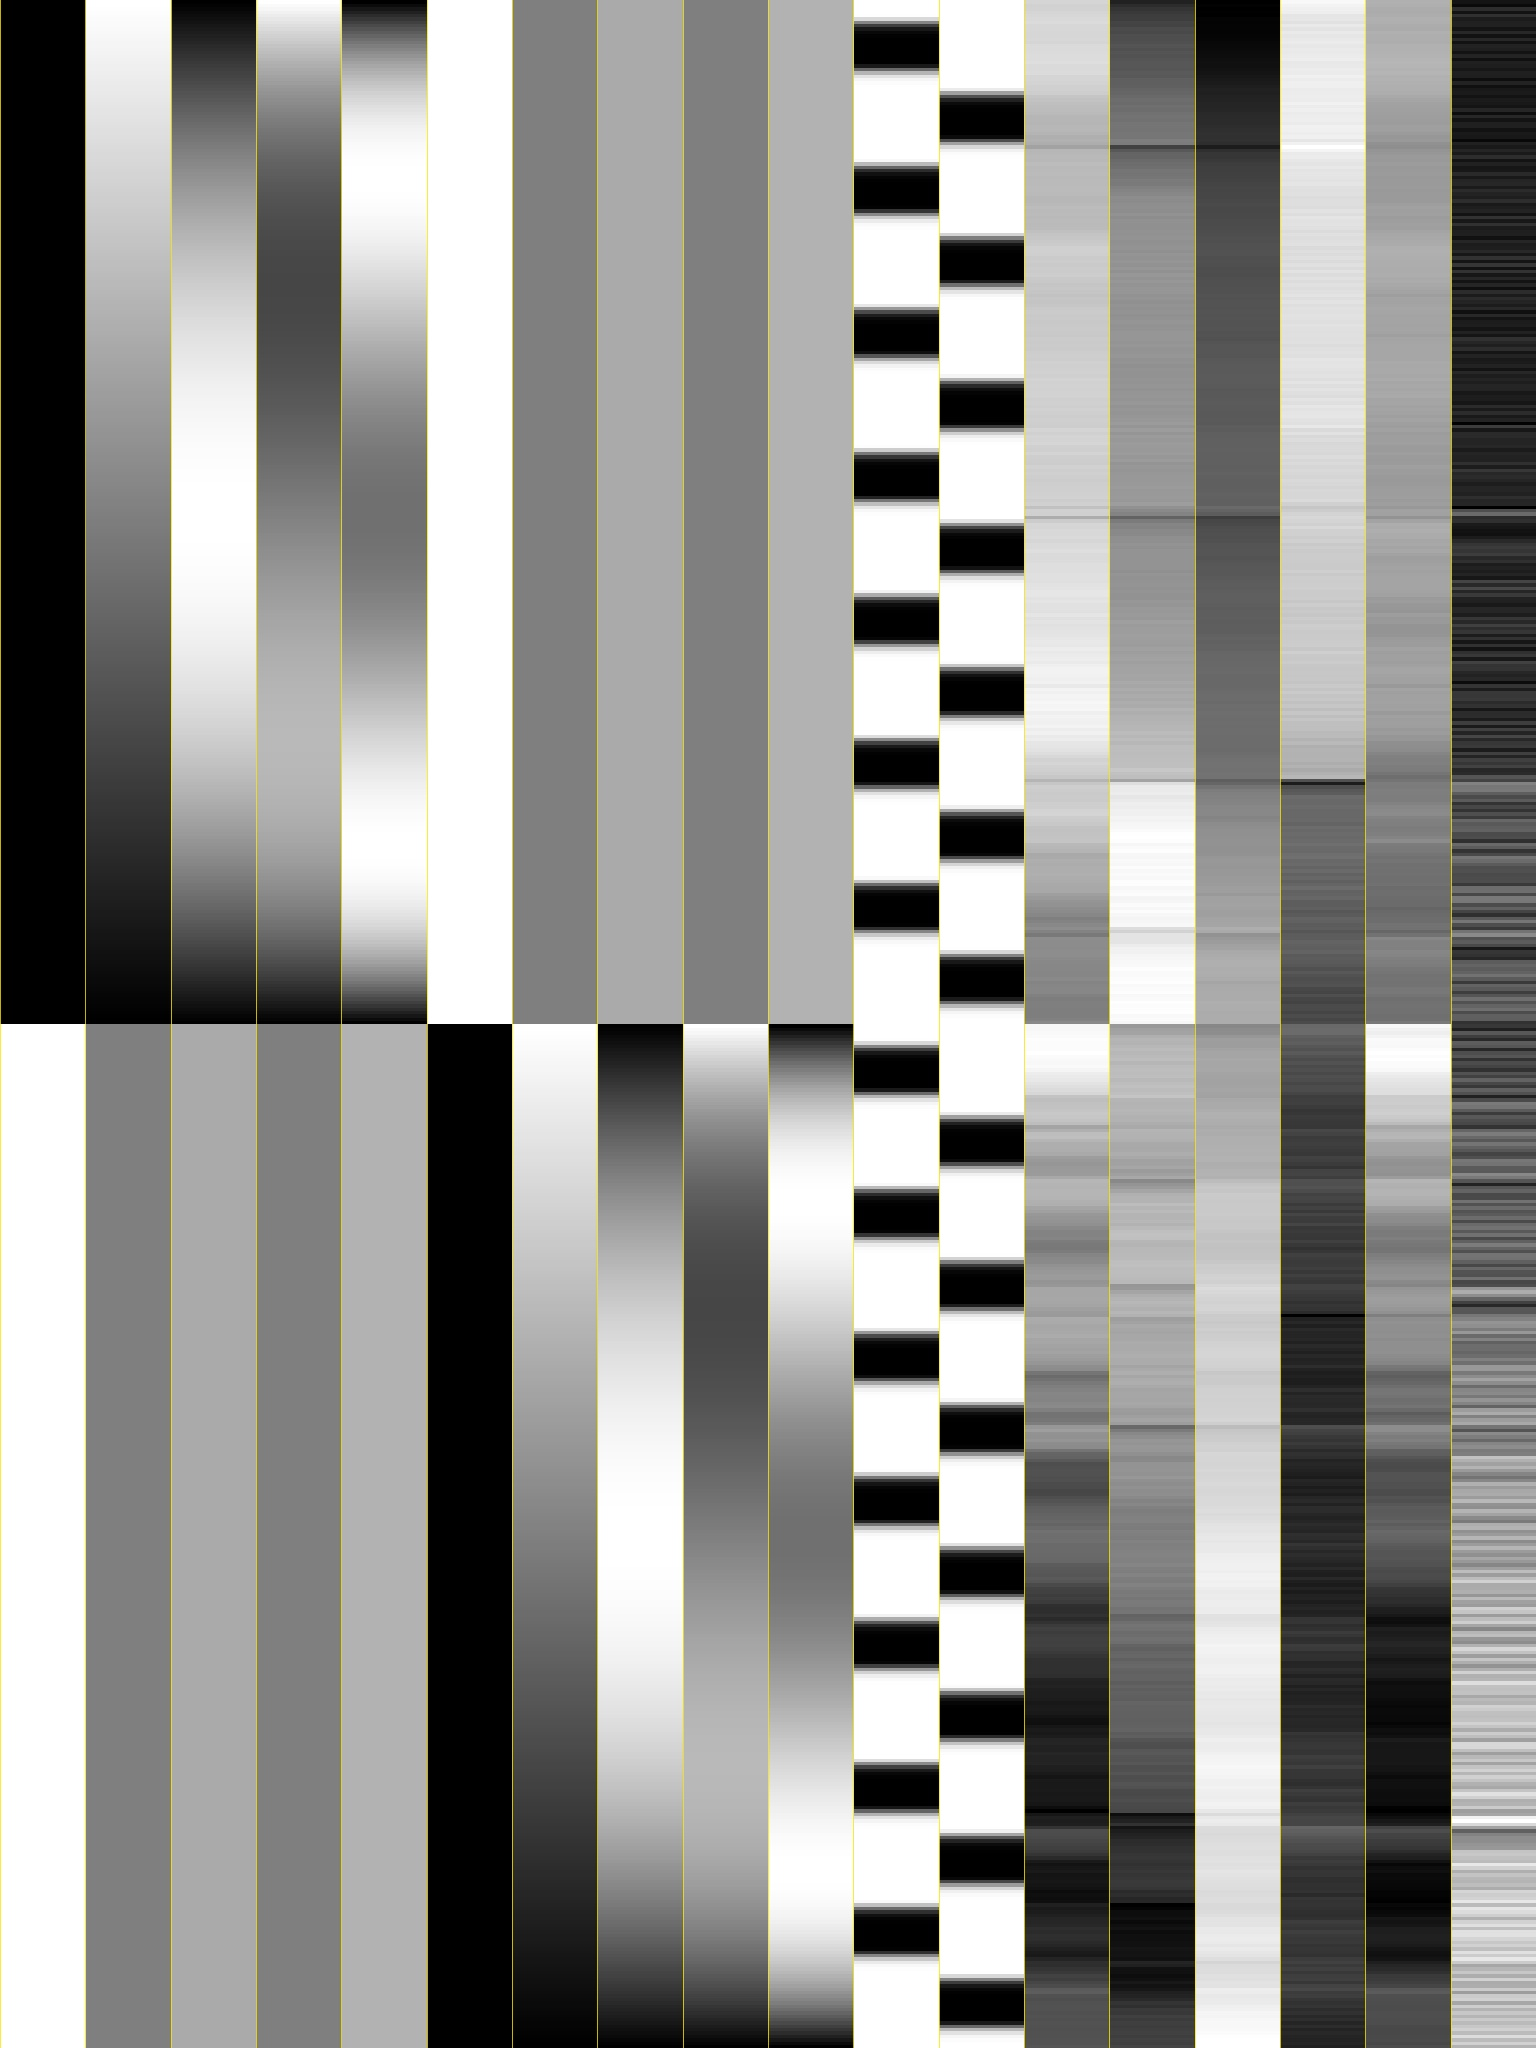

In [58]:
im_loc = Image.open(os.path.join(os.getcwd(), 'X.loc.jpg'))
im_loc